# MNIST Digit Recognition Using Average of Images

---
#### Course: Computational Data Mining
#### Professor: Dr. Fatemeh Shakeri
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### October 2023

# Table Of Contents
- [Introduction](#intro)
- [Dependencies](#dependency)
- [Importing Dataset](#read)
- [Method](#method)
    - [Distance to the Average Image](#average)

<a name="intro"></a>

# Introduction 📚

---

The MNIST database is a well-known dataset in computer vision that includes handwritten digits of 0 to 9.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/MnistExamplesModified.png/320px-MnistExamplesModified.png" width="500"/>

In this article, we convert matrix of each image to a vector and for each digit, we define a space using vector of that digit. Then, we find closest coordination of our new image in each space and label our image with the digit that has closest coordination (least norm of remainder vector).

<a name="dependency"></a>

#Dependencies 🧰

---

We need the following libraries during this article:

- **os** : <br />
    os is among python's standard libraries. We use it to browser directories and import images.

- **numpy** : <br />
    numpy is a commonly used library for doing scientific computation. Unlike python default pointer structure, numpy saves variables inplace and continous on RAM and also provides sophisticated methods that use parallelism to make our computations much faster.

- **PIL**: <br />
    PIL or Pillow library is a common well-known library for image processing. It helps us to read, manipulate and save images. We will use it together with OpenCV.

- **matplotlib** : <br />
    Matplotlib is a well-known library in data science for visualization. We will use matplotlib to demonstrate our results.

- **seaborn** : <br />
    seaborn is built on matplotlib and provides many chart templates for us so we don't need to draw and build every components of our charts with matplotlib.

- **scikit-learn (sklearn)** : <br />
    This library is a known data science library and we will import iris dataset from it and also some metric methods as well.

- **cv2** : <br />
    OpenCV or cv2 is probably the most well-known and the most useful python library for image and video processing.

In [7]:
%%capture
# Python Standard Libraries
import os
import random
# Fundamental Data & Image Analysis Tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
import cv2

<a name="read"></a>

#Importing Dataset 🖼

---

First, we import our dataset from my google drive using gdown.


<a name="download"></a>

####Downloading the Dataset

Lets download our dataset.


In [ ]:
# Download the dataset
!gdown 'ٰ1YIHYl3F7lvjWqH03gy4KShK4sR_i16yv'

Now we unpack our dataset.

In [12]:
%%capture
# Unpack the Dataset
!unzip '/content/TinyMNIST.zip'

Then, we browse the train and test images' directories and import images' addresses.

In [13]:
# Defining Directories
train_dr = 'TinyMNIST/test'
test_dr = 'TinyMNIST/train'
# Browsing Train Directory
train_folders = [addr for addr in os.listdir(train_dr)]
train_paths = {int(folder): [os.path.join(train_dr, folder, path) for path in os.listdir(os.path.join(train_dr, folder))] for folder in train_folders}
# Browsing Test Directory
test_folders = [addr for addr in os.listdir(test_dr)]
test_paths = {int(folder): [os.path.join(test_dr, folder, path) for path in os.listdir(os.path.join(test_dr, folder))] for folder in test_folders}

Finally, lets demonstrate our photo for a quick preview!

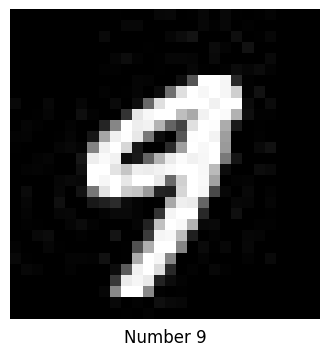

In [14]:
# Selecting a Random Image
num = random.randint(0, 9)
sample_img = np.array(Image.open(random.choice(train_paths[num])))
# Displaying the Image
plt.figure(figsize=(4,8))
plt.axis('off')
plt.title(f'Number {num}', y=-0.1)
plt.imshow(sample_img, cmap='gray')

<a name="method"></a>

#Method 🧭

---


We will implement and test the performance of calculating distance to the average image of each digit.

But before that, we must first import images from imported addresses into numpy dataframes.

In [15]:
train_imgs = {}
test_imgs = {}

# Importing Training Images and Converting to Numpy Array
for key in train_paths.keys():
    train_imgs[key] = np.zeros((len(train_paths[key]), 28*28))
    for idx, addr in enumerate(train_paths[key]):
        train_imgs[key][idx] = np.array(Image.open(random.choice(train_paths[num]))).flatten()

# Importing Test Images and Converting to Numpy Array
for key in test_paths.keys():
    test_imgs[key] = np.zeros((len(test_paths[key]), 28*28))
    for idx, addr in enumerate(test_paths[key]):
        test_imgs[key][idx] = np.array(Image.open(random.choice(test_paths[num]))).flatten()

<a name="average"></a>

#Distance to the Average Image🏋

---

Here, we calculate average of images of each digit and label each test image with the digit that its average has the least distance with.

In [16]:
# Calculate Average Vector for Each Digit
digits_avg = [np.mean(train_imgs[key], axis=0) for key in sorted(train_imgs.keys())]
digits_avg = np.array(digits_avg)

# Calculate Distance of Each Test Image to Average Vector
# and Assign Digit with the Least Distance
conf_mat = np.zeros((10, 10))
for digit in test_imgs.keys():
    for vec in test_imgs[digit]:
        pred = np.argmax(np.sum((digits_avg - vec.reshape(1, -1)) ** 2, axis=1))
        conf_mat[digit][pred] += 1

Now we print model's accuracy and its confusion matrix to visualize its performance.

Correct Predictions: 376.0
Wrong Predictions: 3624.0
Accuracy: 9.4%


<Axes: >

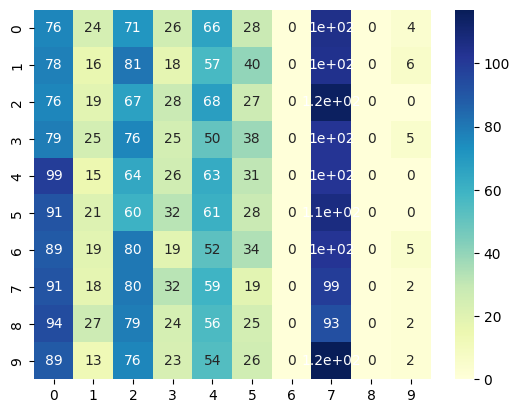

In [17]:
# Calculating #Correct and #Wrong Predictions
corrects = np.trace(conf_mat)
wrongs = np.sum(conf_mat) - np.trace(conf_mat)

# Printing Method's Performance
print(f'Correct Predictions: {corrects}')
print(f'Wrong Predictions: {wrongs}')
print(f'Accuracy: {corrects / (corrects + wrongs) * 100}%')

# Plotting Confusion Matrix
sns.heatmap(conf_mat, annot=True, cmap='YlGnBu')

This method does not show a good performance when it comes to predicting labels. However, it is fast and it is not computationally expensive.


Thanks for you attention! This notebook is available in the link below😀

https://drive.google.com/file/d/1a68LlBjDD6908CH5B1ufS3rzTdkUB9b5/view?usp=sharing